# 1. Data Exploration and Preprocessing

**Objective:** This notebook aims to load raw data, apply necessary preprocessing steps, and verify that the data is ready to be used by our Deep Learning model.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Path Configuration ---
# The notebook is located in 'notebooks/', so we go up one level
# to access the project root.
PROJECT_ROOT = ".."
DATA_PATH = os.path.join(PROJECT_ROOT, "data")
SRC_PATH = os.path.join(PROJECT_ROOT, "src")

# Add the src folder to the path to import our modules
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)

# --- Import our preprocessing functions ---
from load_data import load_demographics, get_file_labels
from preprocess_signals import read_signals, normalize_signals, pad_signals

## 2. Loading Metadata
We first load the `demographics.xls` file to link patient IDs with their group (Control `CO` or Patient `PT`).

In [2]:
demographics = load_demographics(DATA_PATH)
all_files, file_labels = get_file_labels(DATA_PATH, demographics)

print("Demographic data overview:")
print(demographics.head())
print(f"\nTotal number of signal files found: {len(all_files)}")

Demographic data overview:
       ID Study Group  Subjnum  Gender  Age  Height (meters)  Weight (kg)  \
0  GaPt03    Ga    PT        3  female   82             1.45         50.0   
1  GaPt04    Ga    PT        4    male   68             1.71          NaN   
2  GaPt05    Ga    PT        5  female   82             1.53         51.0   
3  GaPt06    Ga    PT        6    male   72             1.70         82.0   
4  GaPt07    Ga    PT        7  female   53             1.67         54.0   

   HoehnYahr  UPDRS  UPDRSM   TUAG  Speed_01 (m/sec)  Speed_10  
0        3.0   20.0    10.0  36.34               NaN     0.778  
1        2.5   25.0     8.0  11.00             0.642     0.818  
2        2.5   24.0     5.0  14.50             0.908     0.614  
3        2.0   16.0    13.0  10.47             0.848     0.937  
4        3.0   44.0    22.0  18.34             0.677     0.579  

Total number of signal files found: 306


## 3. Reading and Preprocessing Signals
Each `.txt` file is read. The following preprocessing pipeline is applied:
1.  **Reading**: The 16 sensor signals are extracted.
2.  **Normalization**: Signals are scaled between 0 and 1 (Min-Max scaling).
3.  **Padding**: Padding is added so all signals have the same length.

In [3]:
X, y = read_signals(all_files, file_labels)
X_norm = normalize_signals(X)
X_array = pad_signals(X_norm)
y_array = np.array(y)

print(f"Data shape after complete preprocessing: {X_array.shape}")
print(f"Labels shape: {y_array.shape}")
print("Example of X_array[0]:\n", X_array[0][:5, :])

Data shape after complete preprocessing: (306, 26366, 16)
Labels shape: (306,)
Example of X_array[0]:
 [[0.41399817 0.30190114 0.42483325 0.09668874 0.20937841 0.25701387
  0.17337123 0.3659601  0.34395198 0.32195122 0.45482866 0.13047162
  0.1566416  0.26869965 0.30167086 0.38704497]
 [0.41399817 0.30190114 0.42483325 0.09668874 0.20937841 0.25701387
  0.17337123 0.3659601  0.34395198 0.32195122 0.45482866 0.13047162
  0.1566416  0.26869965 0.30167086 0.38704497]
 [0.41399817 0.30190114 0.42483325 0.09668874 0.20937841 0.25701387
  0.17337123 0.35473815 0.34395198 0.32195122 0.45482866 0.13047162
  0.1566416  0.26869965 0.30167086 0.38704497]
 [0.41399817 0.30190114 0.42483325 0.09668874 0.20937841 0.25701387
  0.17708789 0.3659601  0.34395198 0.31263858 0.45482866 0.12341147
  0.1566416  0.27589183 0.30167086 0.38704497]
 [0.41399817 0.30190114 0.42483325 0.09668874 0.20937841 0.25701387
  0.17337123 0.35473815 0.34395198 0.31263858 0.45482866 0.13047162
  0.1566416  0.27589183 0.301

## 4. Sample Visualization
To verify that our data has been processed correctly, we visualize the 16 sensor signals for the first recording in our dataset.

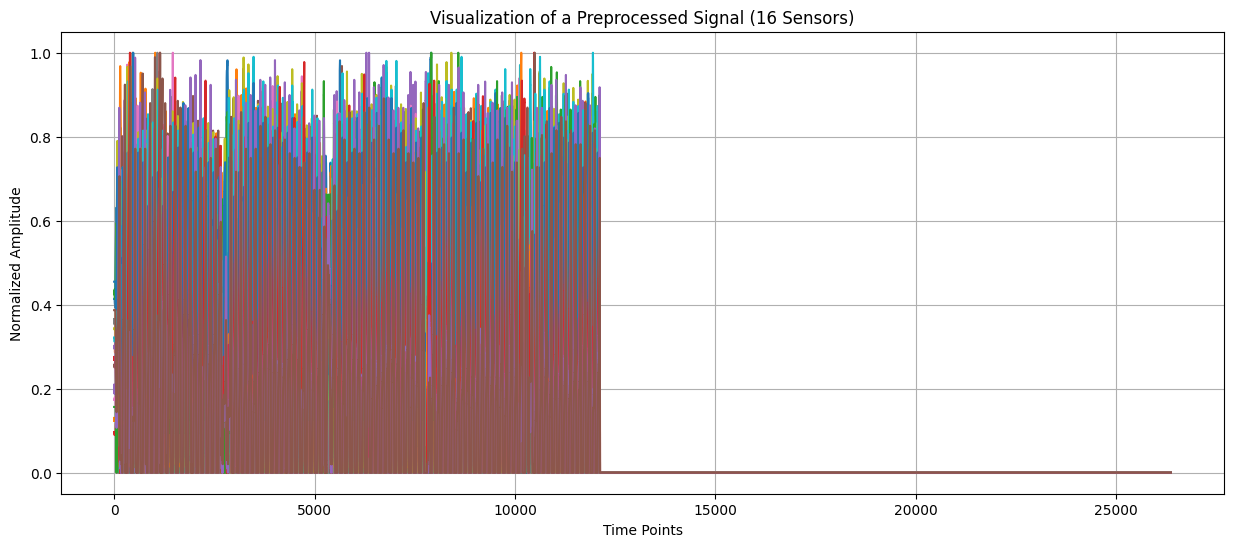

In [4]:
plt.figure(figsize=(15, 6))
plt.title("Visualization of a Preprocessed Signal (16 Sensors)")
# Display the 16 signals from the first sample
plt.plot(X_array[0])
plt.xlabel("Time Points")
plt.ylabel("Normalized Amplitude")
plt.grid(True)
plt.show()